# 2.富士下山問題

In [145]:
import numpy as np
from matplotlib import pyplot as plt
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:140])
print(fuji.shape)

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]
(300, 5)


左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。標高と距離の単位はメートルです。300地点のデータです。

# 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

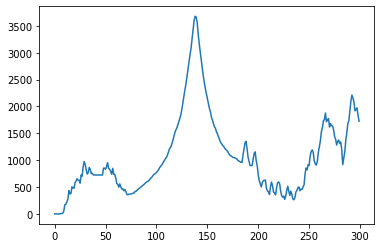

In [146]:
x = fuji[:,0]
y = fuji[:,3]
plt.plot(x,y)
plt.show()


# 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [150]:
def slope(x):
    elevation = fuji[x,3]-fuji[x-1,3]
#distane = fuji[x,4]- fuji[x-1,4]
    slo = elevation 
    return slo

x = 136
koubai = slope(x)
print(koubai)

168.35000000000036


# 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。α は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

《実装上の注意》

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

《ハイパーパラメータとは》

機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [151]:
def Idou(x):
    def slope(x):
        elevation = fuji[x,3]-fuji[x-1,3]
        #distane = fuji[x,4]- fuji[x-1,4]
        slo = elevation 
        return slo

    a = 0.2
    idou_chiten = x - (a* slope(x))
    return np.int64(idou_chiten)

idou_position = Idou(x)

from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
print(Decimal(str(idou_position)).quantize(Decimal('0'), rounding=ROUND_HALF_UP)) #整数に四捨五入



102


# 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

《実装上の注意》
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [152]:
def Kudari(x):
    list_em = []
    list_em.append(x)
    list_em.append(Idou(list_em[-1]))
    print(list_em)
    while True:
        #今いるところlist_em[-1]
        #一つ前のところlist_em[-2]
        if fuji[list_em[-1],3] < fuji[list_em[-2],3]: #今いるところの標高と、前一つ前にいたところの標高で比較
            #print(list_em[-1], list_em[-2])
            list_em.append(Idou(list_em[-1]))       
        else:
            list_em.pop(-1)
            break
    return list_em
        
    

In [153]:
Kudari(136)

[136, 102]


[136, 102, 97, 91, 88, 84, 80, 79, 73]

In [154]:
def Kudari(x):
    list_em = []
    list_em.append(x)
    list_em.append(Idou(list_em[-1]))
    list_nb = 1
    print(list_em)
    while True:
        list_em.append(Idou(list_em[list_nb]))
        list_nb += 1
        if fuji[list_em[list_nb-1],3] < fuji[list_em[list_nb],3]: #今いるところの標高と、前一つ前にいたところの標高で比較       
            list_em.pop(-1)
            break
    return list_em

In [155]:
x= 136
Kudari(x)

[136, 102]


[136, 102, 97, 91, 88, 84, 80, 79, 73]

# 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。
断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

[136, 102]
[136, 102]


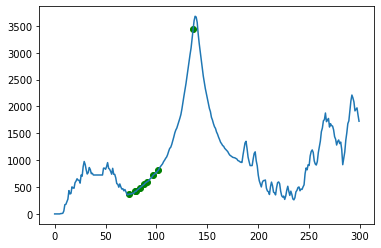

In [156]:
x = fuji[:,0]
y = fuji[:,3]
p = 136
plt.plot(x,y)
plt.scatter(Kudari(p),fuji[Kudari(p),3],color = 'green')
plt.show()

#  【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

《初期値とは》

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

[145, 175]
[145, 175]


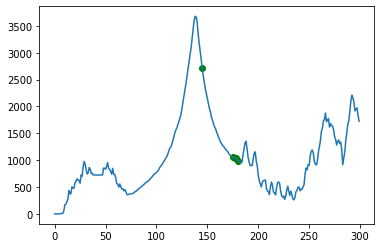

In [157]:
#ex1 p= 145
x = fuji[:,0]
y = fuji[:,3]
p = 145
plt.plot(x,y)
plt.scatter(Kudari(p),fuji[Kudari(p),3],color = 'green')
plt.show()

[160, 168]
[160, 168]


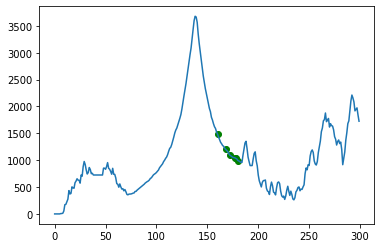

In [158]:
#ex2 p= 160
x = fuji[:,0]
y = fuji[:,3]
p = 160
plt.plot(x,y)
plt.scatter(Kudari(p),fuji[Kudari(p),3],color = 'green')
plt.show()

#  【問題7】（アドバンス問題）ハイパーパラメータの変更